![alt](https://research.utm.my/wp-content/uploads/sites/26/2022/06/logo-300x122.png)
# Center for Artificial Intelligence and Robotics
#### Universiti Teknologi Malaysia


### ANN Classification

*Author: Dr. Ibrahim, Azzam, Thaqif & Syahmi*

**PIMA Dataset**

**Import Package**

In [1]:
import io
import pandas as pd

**Install Package and Obtain Processing Time**

In [2]:
!pip install ipython-autotime

Looking in indexes: http://jetson.webredirect.org/jp6/cu122


In [3]:
%load_ext autotime

time: 234 μs (started: 2024-12-02 06:48:32 +00:00)


**Download PIMA dataset**

In [4]:
import os
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

#Define the output path and create directories if they don't exist
output_dir = 'dataset'
output_path = os.path.join(output_dir, 'pima_indians_diabetes.csv')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the dataset to Google Drive as a CSV file
df.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")

Dataset saved to dataset/pima_indians_diabetes.csv
time: 366 ms (started: 2024-12-02 06:48:54 +00:00)


**Read data in pandas and Display the first few lines of data .csv**

In [5]:
sample_df = pd.read_csv('dataset/pima_indians_diabetes.csv', header=0)

time: 11.1 ms (started: 2024-12-02 06:50:23 +00:00)


In [6]:
sample_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


time: 45.3 ms (started: 2024-12-02 06:50:27 +00:00)


**Define the input, X and label as Y**

In [8]:
import torch
dataset = sample_df.values
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]

# Print the NumPy arrays
print("NumPy X:", X)
print("NumPy Y:", Y)

# Step 4: Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1) # Y_tensor is reshaped to ensure compatibility with the model's output and loss calculation


# Print the PyTorch tensors
print("PyTorch X_tensor:", X_tensor)
print("PyTorch Y_tensor:", Y_tensor)

NumPy X: [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
NumPy Y: [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0

**Import Package for Pytorch to design ANN**

In [9]:
!pip install scikit-learn

Looking in indexes: http://jetson.webredirect.org/jp6/cu122
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.2 MB/s eta 0:00:00
time: 16.1 s (started: 2024-12-02 07:01:13 +00:00)


In [10]:
!pip install matplotlib

Looking in indexes: http://jetson.webredirect.org/jp6/cu122
time: 3.67 s (started: 2024-12-02 07:01:30 +00:00)


In [11]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


time: 3.57 s (started: 2024-12-02 07:21:53 +00:00)


In [12]:
# Define model parameters
input_dim = 8
hidden_dim1 = 12
hidden_dim2 = 8
output_dim = 1
num_epochs = 1000
batch_size = 16
learning_rate = 0.001

time: 1.4 ms (started: 2024-12-02 07:22:15 +00:00)


**Create Class for dataset and dataloader**

DataLoader is a fundamental part of the data loading utility that makes it easier to iterate over batches of data.



In [13]:
class DiabetesDataset(Dataset):
    def __init__(self, data):
        # In the initialization method, we define how to load our dataset.
        # Here, we use data.drop() to identify and exclude the 'Outcome' column, extracting features and labels.
        self.features = torch.tensor(data.drop('Outcome', axis=1).values, dtype=torch.float32)
        self.labels = torch.tensor(data['Outcome'].values, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

time: 3.01 ms (started: 2024-12-02 07:22:26 +00:00)


In [14]:
import torch
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split

# Assuming DiabetesDataset and sample_df are defined properly
diabetes_dataset = DiabetesDataset(sample_df)

# Define the sizes of the splits
total_size = len(diabetes_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset into train, validation, and test sets
train_data, temp_data = random_split(diabetes_dataset, [train_size, val_size + test_size])
val_data, test_data = random_split(temp_data, [val_size, test_size])

# Define batch size
batch_size = 32

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

time: 77 ms (started: 2024-12-02 07:23:00 +00:00)


**Create ANN Model**

In [15]:
# Define the PyTorch model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

time: 2.02 ms (started: 2024-12-02 07:24:33 +00:00)


In [16]:
# Initialize the neural network
model = ANNModel(input_dim, hidden_dim1, hidden_dim2, output_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Print the model architecture
print(model)

ANNModel(
  (fc1): Linear(in_features=8, out_features=12, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
time: 2.19 s (started: 2024-12-02 07:27:59 +00:00)


**Path to save the model**

In [17]:
# Define the path to save the model
model_path = 'model/pima_model_cubatrytest.pt'

time: 719 μs (started: 2024-12-02 07:28:14 +00:00)


**Define Optimizer and Loss Function for Training Phase**

In [18]:
# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    predicted = outputs.round()
    correct = (predicted == labels).float().sum()
    accuracy = correct / labels.size(0)
    return accuracy.item()

# Set the seed for reproducibility
torch.manual_seed(7)
np.random.seed(7)

time: 31.4 ms (started: 2024-12-02 07:36:08 +00:00)


In [19]:
# Initialize lists to store loss and accuracy
epoch_losses = []
epoch_accuracies = []
val_accuracies = []
val_losses = []
best_val_accuracy = 0.0

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    for i, (input, labels) in enumerate(train_loader):  # Renamed 'features' to 'input'
        # Forward pass
        outputs = model(input)

        # Reshape labels to match the shape of model outputs and convert to Float
        labels = labels.unsqueeze(1).float()  # Add an extra dimension and convert to Float

        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate batch accuracy
        accuracy = calculate_accuracy(outputs, labels)

        epoch_loss += loss.item()
        epoch_accuracy += accuracy

    epoch_loss /= len(train_loader)
    epoch_accuracy /= len(train_loader)

    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    # Validation
    val_loss = 0.0  # Initialize validation loss variable
    val_accuracy = 0.0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for input_val, labels_val in val_loader:
            outputs_val = model(input_val)
            loss_val = criterion(outputs_val, labels_val.unsqueeze(1).float())  # Compute validation loss
            accuracy_val = calculate_accuracy(outputs_val, labels_val.unsqueeze(1).float())  # Adjust labels shape and convert to Float
            val_loss += loss_val.item()  # Accumulate validation loss
            val_accuracy += accuracy_val
        val_loss /= len(val_loader)  # Compute average validation loss
        val_losses.append(val_loss)  # Store validation loss
        val_accuracy /= len(val_loader)
        val_accuracies.append(val_accuracy)
    model.train()  # Set the model back to training mode

    # Save model if validation accuracy improves
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_params = model.state_dict()
        torch.save(best_model_params, model_path)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


# Print final results
avg_loss = sum(epoch_losses) / len(epoch_losses)
print(f"Training complete. Average Loss: {avg_loss:.4f}, Best Validation Accuracy: {best_val_accuracy:.4f}")

Epoch [1/1000], Loss: 1.0910, Accuracy: 0.3639, Validation Loss: 0.7837, Validation Accuracy: 0.3819
Epoch [2/1000], Loss: 0.9012, Accuracy: 0.3849, Validation Loss: 0.6976, Validation Accuracy: 0.3715
Epoch [3/1000], Loss: 0.7912, Accuracy: 0.4604, Validation Loss: 0.6561, Validation Accuracy: 0.6250
Epoch [4/1000], Loss: 0.7328, Accuracy: 0.6088, Validation Loss: 0.6349, Validation Accuracy: 0.6632
Epoch [5/1000], Loss: 0.6969, Accuracy: 0.6296, Validation Loss: 0.6251, Validation Accuracy: 0.6840
Epoch [6/1000], Loss: 0.6746, Accuracy: 0.6232, Validation Loss: 0.6241, Validation Accuracy: 0.6944
Epoch [7/1000], Loss: 0.6629, Accuracy: 0.6277, Validation Loss: 0.6280, Validation Accuracy: 0.6944
Epoch [8/1000], Loss: 0.6581, Accuracy: 0.6259, Validation Loss: 0.6315, Validation Accuracy: 0.6944
Epoch [9/1000], Loss: 0.6545, Accuracy: 0.6249, Validation Loss: 0.6350, Validation Accuracy: 0.6840
Epoch [10/1000], Loss: 0.6491, Accuracy: 0.6335, Validation Loss: 0.6372, Validation Accura

**Prepare Data for Validation**
# Answer for Question 1 - Prediction

In [21]:
# testing
dtest = X[400,0:8]
dtest = np.expand_dims(dtest, axis=0)

# Assuming 'model' is your trained model and 'X' is your dataset
dtest = X[400, 0:8]
dtest = np.expand_dims(dtest, axis=0)  # Add batch dimension

# Convert dtest to a torch tensor and float type
dtest_tensor = torch.tensor(dtest, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    predictions = model(dtest_tensor)

# Since you're dealing with binary classification, assume sigmoid activation in the output layer
score = predictions[0].item()

# Calculate probabilities for each class
other = 1 - score
val = np.array([score, other])

# Get the predicted class (0 or 1)
classes = np.argmax(val)

print(
    "This sample is %.2f percent Diabetic and %.2f percent NotDiabetic."
    % (100 * score, 100 * other)
)  # Will print on the Console

print("The predicted class is: ", classes)

This sample is 34.92 percent Diabetic and 65.08 percent NotDiabetic.
The predicted class is:  1
time: 7.43 ms (started: 2024-12-02 07:55:34 +00:00)


**Obtain Training Info for Loss and Accuracy**
# Answer for Question 2 - Save the Model

In [22]:
# model is your variable that you have trained to save in model folder

## Answer Here ##
torch.save(model.state_dict(), model_path)

time: 6.86 ms (started: 2024-12-02 07:55:37 +00:00)


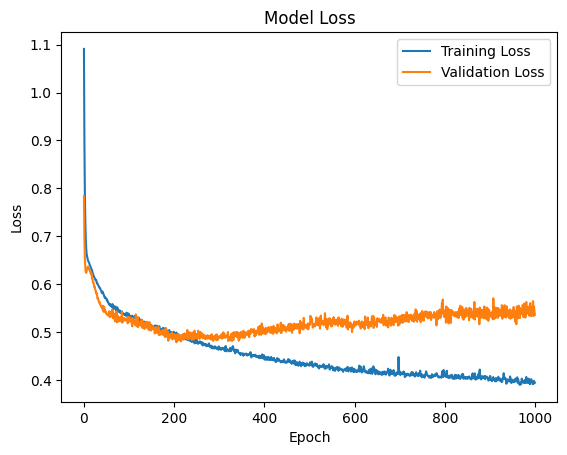

time: 401 ms (started: 2024-12-02 07:55:37 +00:00)


In [23]:
import matplotlib.pyplot as plt

# Assuming you have collected epoch_losses and val_losses during training and validation, respectively
plt.plot(epoch_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Answer for Question 3 - Plot The Model Accuracy

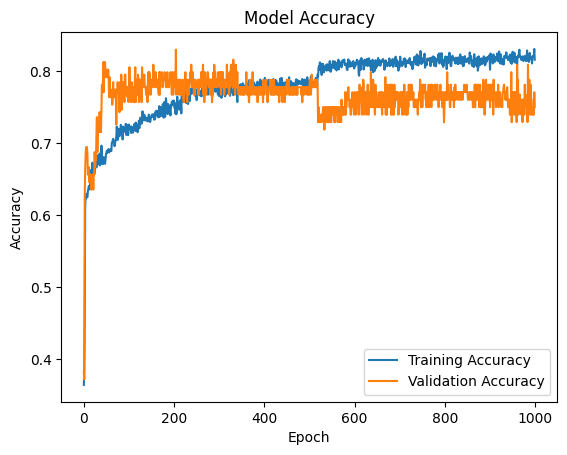

time: 288 ms (started: 2024-12-02 07:55:40 +00:00)


In [24]:
# Plot Accuracy Graph

plt.plot(epoch_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Serialize the Model to gdrive**

**Check the Model in the Working Folder in gdrive**
# Answer Question 4 - Load The Model

In [25]:
# Initialize your model instance
loaded_model = ANNModel(input_dim, hidden_dim1, hidden_dim2, output_dim)

# Path to the saved model on Google Drive
model_path = 'model/pima_model.pt'

# Load the state dictionary
## Answer Here ##
state_dict = torch.load(model_path)

# Load the state dictionary into the model
loaded_model.load_state_dict(state_dict)

# Set the model to evaluation mode
loaded_model.eval()




ANNModel(
  (fc1): Linear(in_features=8, out_features=12, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

time: 15.9 ms (started: 2024-12-02 07:55:42 +00:00)


# Answer Question 5 - Prediction on the Loaded Model




In [26]:
# Question 5
# Use the loaded model for prediction

# Assuming 'model' is your trained model and 'X' is your dataset
dtest = X[300, 0:8]
dtest = np.expand_dims(dtest, axis=0)  # Add batch dimension

# Convert dtest to a torch tensor and float type
dtest_tensor = torch.tensor(dtest, dtype=torch.float32)

# Set the model to evaluation mode
loaded_model.eval()

# Get predictions
with torch.no_grad():
    ## Answer Here ##

# Since you're dealing with binary classification, assume sigmoid activation in the output layer
score1 = predictions[0].item()

# Calculate probabilities for each class
other1 = 1 - score1
val1 = np.array([score1, other1])

# Get the predicted class (0 or 1)
classes1 = np.argmax(val1)


print(
    "This sample is %.2f percent Diabetic and %.2f percent NotDiabetic."
    % (100 * score1, 100 * other1)
)  # Will print on the Console

print("The predicted class is: ", classes1)

IndentationError: expected an indented block after 'with' statement on line 15 (3165319625.py, line 19)

time: 4.39 ms (started: 2024-12-02 07:55:44 +00:00)
